<a href="https://colab.research.google.com/github/YetAnotherApoorva/Machine-Learning-Projects/blob/main/Project_Customer_Segmenration_using_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Details

In this project we use Mall Customer Segmentation data which is used to create clusters of customers on the basis of their Income and Spending habit. This is done to figure out which customer are more likely to shop more and thus they cab be targeted for new sales and new collections.

We will be using K-means clustering algorithm to segment the data. Its a clean daatset which does not require data preprocessing step. It is good to practice clustering algorithms.

#### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Dataset present at Kaggle https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/

# Load data
from zipfile import ZipFile

filename = '/content/gdrive/MyDrive/Datasets/Mall Customer Segmentation Data.zip'

# open the zip file in read mode
with ZipFile(filename, 'r') as zip:
  # print all the contents of the zip file
  zip.printdir()

  # extract all the files
  print('Extracting all the files now...')
  zip.extractall()
  print('Done!')

File Name                                             Modified             Size
Mall_Customers.csv                             2019-10-03 14:10:00         3981
Extracting all the files now...
Done!


In [ ]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.shape

(200, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Missing value

In [ ]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing values

In [ ]:
data['CustomerID'].nunique()

200

- There are 200 unique customer ids.

In [ ]:
data['Gender'].value_counts(normalize=True)*100

Female    56.0
Male      44.0
Name: Gender, dtype: float64

In [ ]:
data[['Age', 'Annual Income (k$)','Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


- Age Range - 18 to 70 years, with mean 39 years.
- Annual Income - 15 to 137 k$, with mean 60.
- Spending Score - 1 to 99 with mean 50 score.


# Data Preparation

In [ ]:
# Feature Selection for the model
# For the base model, considering only two features, Annual Income and Spending Score.

X = data[['Annual Income (k$)','Spending Score (1-100)']].values
X


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Modeling

In [ ]:
# Finding K value
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_init = 100, n_clusters = i)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

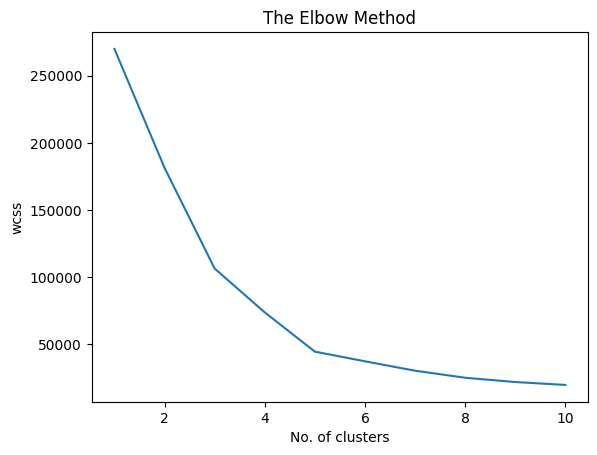

In [ ]:
# plot
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

- From the plot, the elbow point is present at 5. Thus keeing k=5.

In [ ]:
# Building model with k=5 clusters
model = KMeans(n_init=100, n_clusters=5)
y_means = model.fit_predict(X)

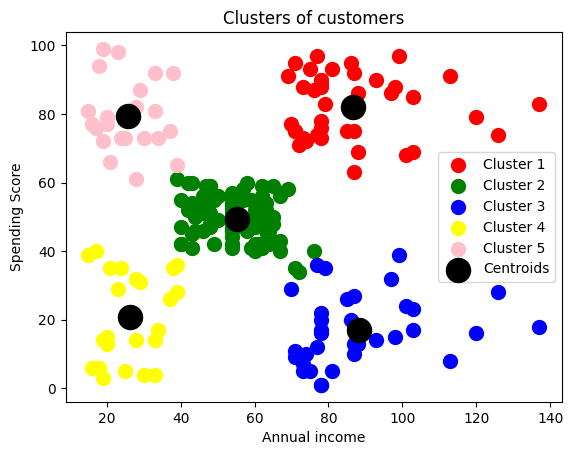

In [ ]:
#visualise clusters
plt.scatter(X[y_means == 0,0], X[y_means == 0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], s=100, c='green', label='Cluster 2')
plt.scatter(X[y_means == 2,0], X[y_means == 2,1], s=100, c='blue', label='Cluster 3')
plt.scatter(X[y_means == 3,0], X[y_means == 3,1], s=100, c='yellow', label='Cluster 4')
plt.scatter(X[y_means == 4,0], X[y_means == 4,1], s=100, c='pink', label='Cluster 5')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s=300, c='black', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## Model Interpolation

- Cluster 1 [Red] - High earning and high spending [Target set]
- Cluster 2 [Green] - Average earning and spending
- Cluster 3 [Blue] - High earning but less spending
- Cluster 4 [Yellow] - Low earning and spending
- Cluster 5 [Pink] - Low earning bit high spending

## Recommendations

- Target customers belonging to Cluster 1 by putting them into some alerting system where email can be send to them on daily basisas these are easy to convert.
- For other customers we can send alerts once in a week or month.